# Investigating the dependence of the acceleration of calculating the integral on the number of processes and threads

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The measurements are provided by running `compute-integral` executable on the MPI cluster

In [4]:
results_path = "data.csv"

data = pd.read_csv(results_path)
data.head()

,parts,proc,threads,accel
0,1000,1,1,0.584572
1,1000,1,2,0.224677
2,1000,1,3,0.173575
3,1000,1,4,0.157806
4,1000,1,5,0.131484


Text(0.5, 0, 'number of MPI processes')

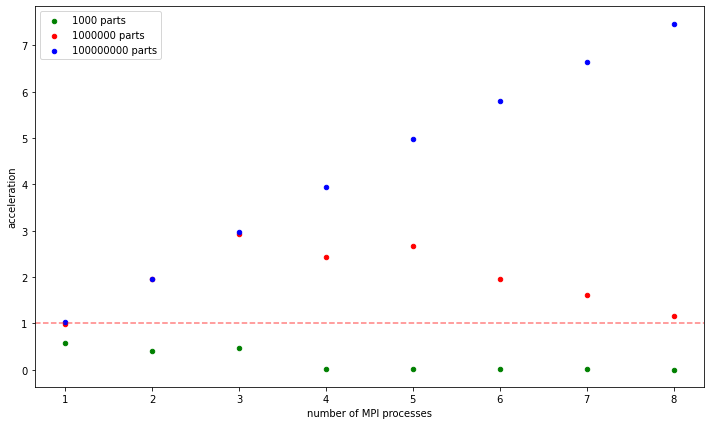

In [5]:
def plot_slice(data, n_parts, ax, color):
    data_slice = data.loc[(data['parts'] == n_parts) & (data['threads'] == 1)]
    data_slice.plot.scatter(x = 'proc', y = 'accel', color=color, label="{} parts".format(n_parts), ax=ax)
     
fig, ax = plt.subplots(figsize=(12, 7))

plot_slice(data, 1000, ax, 'g')
plot_slice(data, 1000000, ax, 'r')
plot_slice(data, 100000000, ax, 'b')

plt.axhline(y=1, color='r', alpha=0.5, linestyle='--')

ax.set_ylabel('acceleration')
ax.set_xlabel('number of MPI processes')

In [6]:
fig.savefig("acceleration-proc.png")

__Conclusion:__ As we can see, when number of parts in partition is small enough, the acceleration is below 1, so using MPI on small computational tasks is not reasonable. However, when number of parts grows, using MPI gives an acceleration multiple of the number of processes. On $1000000$ parts we can see the moment, when MPI communitation starts to take more time, and acceleration decreases.

## MPI vs OMP

Let's display, how acceleration depends on the number of processes and the number of threads per process

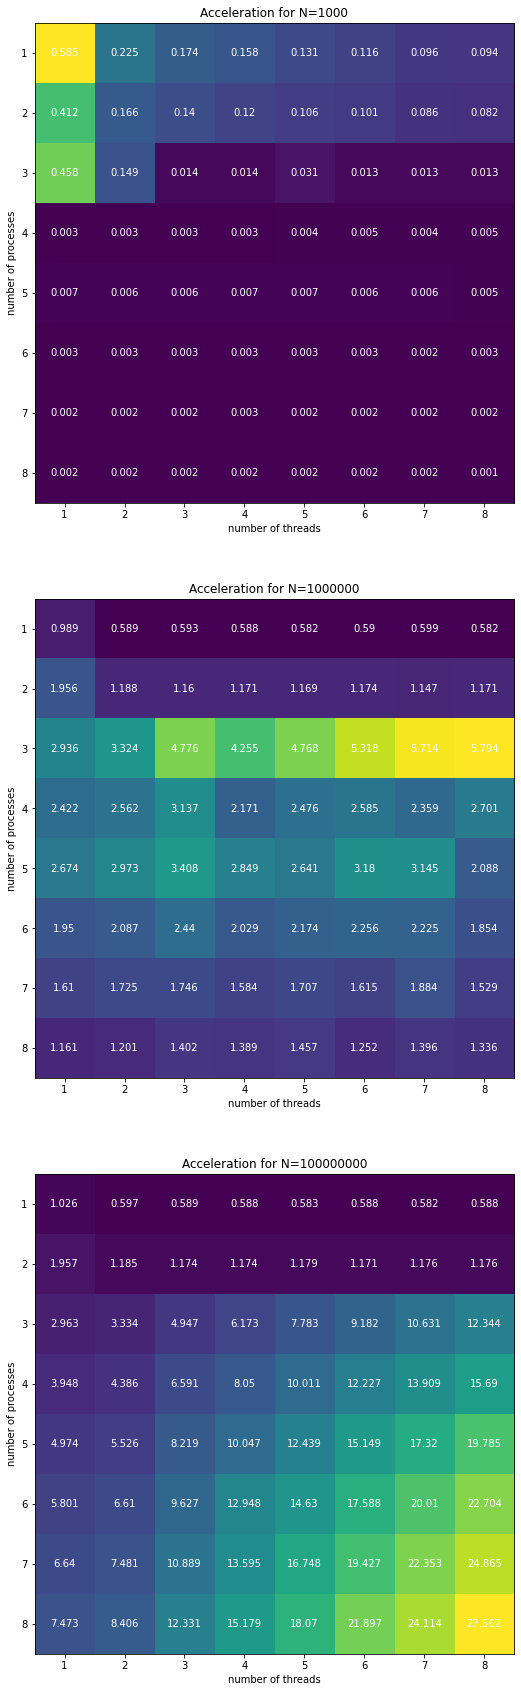

In [7]:
def display_heatmap(data, n_parts, ax):
    data_slice = data.loc[data['parts'] == n_parts]
    
    accel = data_slice.pivot(index='proc', columns='threads', values='accel')
    accel = accel.round(3)
    
    ax.imshow(accel)
    ax.set_title("Acceleration for N={}".format(n_parts))
    ax.set_xlabel("number of threads")
    ax.set_ylabel("number of processes")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(accel.index)))
    ax.set_yticks(np.arange(len(accel.columns)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(accel.index)
    ax.set_yticklabels(accel.columns)
    
    for i in range(len(accel.index)):
        for j in range(len(accel.columns)):
            text = ax.text(j, i, accel[j+1][i+1], ha="center", va="center", color="w")
    
fig, ax = plt.subplots(3, 1, figsize=(10, 30))

display_heatmap(data, 1000, ax[0])
display_heatmap(data, 1000000, ax[1])
display_heatmap(data, 100000000, ax[2])

In [8]:
fig.savefig("heatmaps.png")